<a href="https://colab.research.google.com/github/paigemb4/DS1002/blob/main/words_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paige Barron and Clarissa Russo

In [4]:
!pip install english_words
from english_words import get_english_words_set
words = get_english_words_set(['web2'], lower=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for english_words: filename=english_words-2.0.1-py3-none-any.whl size=8196238 sha256=bef359ff7926d44486c2e228774651e7ea9238c16c31bbe756f6fd8f9047b560
  Stored in directory: /root/.cache/pip/wheels/f0/e6/d9/16a123647999fe535f03a36e7af23eef203736d84c7ca25b0b
Successfully built english_words


1.

In [5]:
print(type(words))
wordlist = list(words)
print(type(wordlist))
print(len(wordlist))

<class 'set'>
<class 'list'>
234450


2.

In [6]:
print(wordlist[:10])

['reliquidation', 'interspecial', 'calyces', 'unconvincedness', 'blindfast', 'dodlet', 'invisibly', 'bene', 'percher', 'masterfully']


We noticed that the words are super random and vary in length. They also don't really follow a theme/seem related to each other.

3.

In [7]:
alpha_list = sorted(wordlist)
print(alpha_list[:10])

['a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic']


4.

In [8]:
count = 0
for word in wordlist:
  if word.startswith('a'):
    count += 1
print(count)

16982


5.

In [11]:
#words with q
count_q = 0
for word in wordlist:
  if 'q' in word:
    count_q += 1
print(count_q)

#fraction of words without e
count_not_e = 0
for word in wordlist:
  if 'e' not in word:
    count_not_e +=1
fraction_not_e = count_not_e / len(wordlist)
print(fraction_not_e)

3624
0.32828321603753463


6.

In [18]:
import numpy as np

wordlist_array = np.array([wordlist])
alpha_list_array = np.array([alpha_list])
count_q_array = np.array([count_q])
count_not_e_array = np.array([count_not_e])
fraction_not_e_array = np.array([fraction_not_e])

alphabet = [chr(i) for i in range(ord('a'),ord('z')+1)]
#this creates a list called alphabet that includes all of the lowercase letters in the alphabet

7.

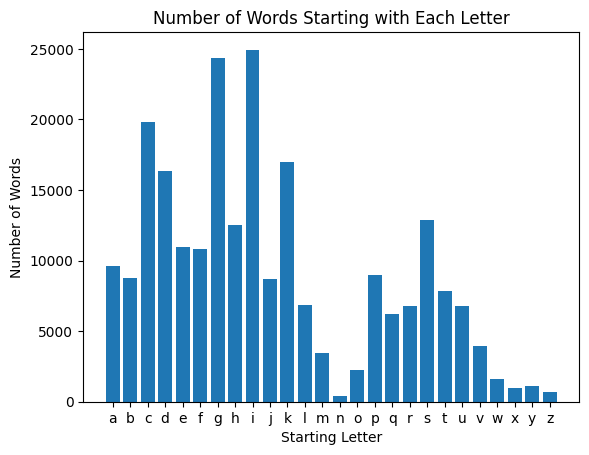

In [21]:
import matplotlib.pyplot as plt

wordlist = list(words)
start_count = {}
for word in wordlist:
    first_letter = word[0]
    start_count[first_letter] = start_count.get(first_letter, 0) + 1

letters = list(start_count.keys())
counts = list(start_count.values())

letters.sort()
plt.bar(letters, counts)
plt.xlabel('Starting Letter')
plt.ylabel('Number of Words')
plt.title('Number of Words Starting with Each Letter')
plt.show()

8.

In [22]:
wordlist_sorted = sorted(wordlist, key=len, reverse=True)
six_longest_words = wordlist_sorted[:6]
print(six_longest_words)

['antidisestablishmentarianism', 'tetraiodophenolphthalein', 'pathologicopsychological', 'scientificophilosophical', 'formaldehydesulphoxylate', 'thyroparathyroidectomize']


9.

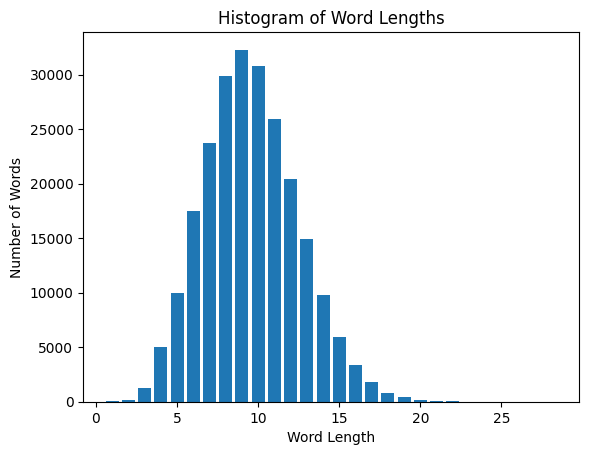

9


In [24]:
#histogram
word_lengths = {}
for word in wordlist:
    length = len(word)
    word_lengths[length] = word_lengths.get(length, 0) + 1

lengths = list(word_lengths.keys())
counts = list(word_lengths.values())

plt.bar(lengths, counts)
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Histogram of Word Lengths')
plt.show()

#most common length
most_common_length = max(word_lengths, key=word_lengths.get)
print(most_common_length)

10. bonus, but now a regular problem

In [27]:
#words containing a "v" and an "a":
count_va = 0
for word in wordlist:
    if 'v' in word and 'a' in word:
        count_va += 1
print(count_va)

#words containing a "w" and a "l":
count_wl = 0
for word in wordlist:
    if 'w' in word and 'l' in word:
        count_wl += 1
print(count_wl)

#it took 0 seconds to run

11347
4822


BONUS:

1.

In [29]:
#pair of letters that appear the most
from collections import defaultdict

pair_count = defaultdict(int)
for word in wordlist:
    pairs = set(zip(word, word[1:]))
    for pair in pairs:
        pair_count[pair] += 1
most_common_pair = max(pair_count, key=pair_count.get)
print(most_common_pair)

#count of words with that pair
count_most_common_pair = pair_count[most_common_pair]
print(count_most_common_pair)

('e', 'r')
40403


2.

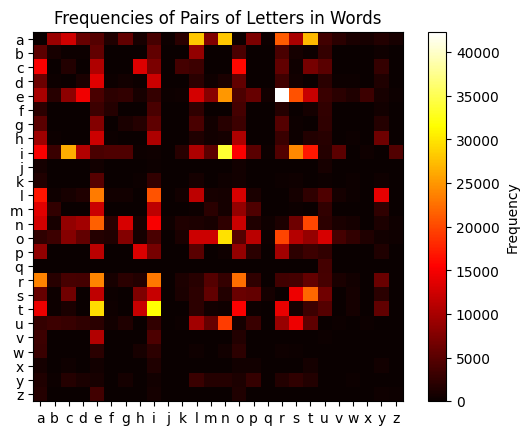

In [36]:
pair_frequencies = np.zeros((26, 26), dtype=int)
def letter_index(letter):
    return ord(letter) - ord('a')
for word in wordlist:
    pairs = zip(word, word[1:])
    for pair in pairs:
        if pair[0].isalpha() and pair[1].isalpha():
           pair_frequencies[letter_index(pair[0].lower())][letter_index(pair[1].lower())] += 1

plt.imshow(pair_frequencies, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(26), [chr(i) for i in range(ord('a'), ord('z')+1)])
plt.yticks(np.arange(26), [chr(i) for i in range(ord('a'), ord('z')+1)])
plt.colorbar(label='Frequency')
plt.title('Frequencies of Pairs of Letters in Words')
plt.show()